In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import math as mt
import pandas as pd
import datetime

In [22]:
data = pdr.get_data_yahoo('TSLA', start='2016-01-01', end='2020-10-01')

In [23]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [24]:
def crossover_sinal(data, curto=15, longo=50):
    data[f'SMA{curto}'] = data['Close'].rolling(curto).mean()
    data[f'SMA{longo}'] = data['Close'].rolling(longo).mean()

    data['Anterior'] = data[f'SMA{curto}'].shift(1) - data[f'SMA{longo}'].shift(1)
    data['Atual'] = data[f'SMA{curto}'] - data[f'SMA{longo}']

    data.loc[(data['Anterior']<0) & (data['Atual']>0), 'Compra'] = data['Close']
    data.loc[(data['Anterior']>0) & (data['Atual']<0), 'Venda'] = data['Close']

    data.loc[(data['Compra'].isna()),'Compra'] = 0
    data.loc[0,'Compra'] = np.NaN

    data.loc[(data['Venda'].isna()),'Venda'] = 0
    data.loc[0,'Venda'] = np.NaN

    columns = ['Close', f'SMA{curto}', f'SMA{longo}', 'Compra', 'Venda']
    return data[columns].dropna()

In [25]:
output_df = crossover_sinal(data)
output_df.tail()

,Close,SMA15,SMA50,Compra,Venda
Date,,,,,
2020-09-25 00:00:00,407.339996,405.646667,366.179679,0.0,0.0
2020-09-28 00:00:00,421.200012,405.838668,368.600319,0.0,0.0
2020-09-29 00:00:00,419.070007,411.762669,370.409719,0.0,0.0
2020-09-30 00:00:00,429.010010,415.944670,372.716479,0.0,0.0
2020-10-01 00:00:00,448.160004,421.066003,375.310359,0.0,0.0


In [26]:
start = pd.to_datetime("2019-01-01").date()
end = pd.to_datetime("2020-12-01").date()

In [27]:
filterted_data = output_df.copy()
filterted_data.index = [pd.Timestamp(i).date() for i in filterted_data.index]
a = (filterted_data.index >= start)&(filterted_data.index < end)

filterted_data = filterted_data.loc[a]


In [28]:
filterted_data

,Close,SMA15,SMA50,Compra,Venda
2019-01-02,62.023998,67.251066,67.336080,0.0,62.023998
2019-01-03,60.071999,66.365733,67.497520,0.0,0.000000
2019-01-04,63.537998,65.713600,67.724480,0.0,0.000000
2019-01-07,66.991997,65.155866,67.887760,0.0,0.000000
2019-01-08,67.070000,64.751066,68.075160,0.0,0.000000
...,...,...,...,...,...
2020-09-25,407.339996,405.646667,366.179679,0.0,0.000000
2020-09-28,421.200012,405.838668,368.600319,0.0,0.000000
2020-09-29,419.070007,411.762669,370.409719,0.0,0.000000
2020-09-30,429.010010,415.944670,372.716479,0.0,0.000000


Text(0.5, 0, 'Data')

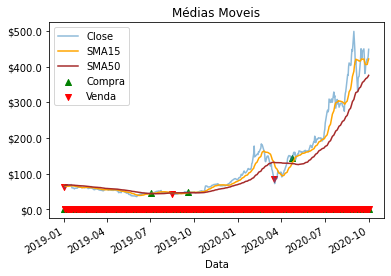

In [29]:
fig, ax = plt.subplots()
ax.plot(filterted_data.index, filterted_data['Close'], label='Close', alpha=0.5)
ax.plot(filterted_data.index, filterted_data['SMA15'], label='SMA15', color='orange')
ax.plot(filterted_data.index, filterted_data['SMA50'], label='SMA50', color='brown')

ax.scatter(filterted_data.index, filterted_data['Compra'], marker='^', label='Compra', color='green')
ax.scatter(filterted_data.index, filterted_data['Venda'], marker='v', label='Venda', color='red')

fig.autofmt_xdate()
ax.legend()

ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Médias Moveis')
ax.set_xlabel('Data')


In [30]:
filterted_data

,Close,SMA15,SMA50,Compra,Venda
2019-01-02,62.023998,67.251066,67.336080,0.0,62.023998
2019-01-03,60.071999,66.365733,67.497520,0.0,0.000000
2019-01-04,63.537998,65.713600,67.724480,0.0,0.000000
2019-01-07,66.991997,65.155866,67.887760,0.0,0.000000
2019-01-08,67.070000,64.751066,68.075160,0.0,0.000000
...,...,...,...,...,...
2020-09-25,407.339996,405.646667,366.179679,0.0,0.000000
2020-09-28,421.200012,405.838668,368.600319,0.0,0.000000
2020-09-29,419.070007,411.762669,370.409719,0.0,0.000000
2020-09-30,429.010010,415.944670,372.716479,0.0,0.000000
